# Image processing and analysis in Python: an introduction


### 1. Overview & learning objectives
In this notebook, we will discuss (without much detail) how to use Python to analyze biological images. As a "vertebrating" example, we will quantify the morphology of cells in developing fruit fly embryos. Specifically, you will learn how to open and display images, apply basic filters, segment individual cells, quantify their size and shape, and visualize the results. 

This notebook also serves as a model of what you are expected to do when it is your turn to present in BME1462. 

With this notebook you will:

1. Gain an understanding of how to represent images in Python and numpy.

1. Learn the basic steps of a complex image segmentation procedure. 

1. Experiment with filtering, thresholding, mathematical morphology, and watershed-based segmentation.

1. Measure cells in images and display the results.

Please, **note** that this notebook is not an exhaustive introduction to Python, numpy, scikit-image, or matplotlib. For tutorials and official documentation, please check at the [end of this notebook](#additional_materials).

### 2. Images as Python lists
In this section, we will discuss the basic Python tools necessary to process and analyze images. 

We will consider a two-dimensional image as a matrix in which each element contains the corresponding pixel value. In Python, **matrices can be represented as lists of lists**:

In [3]:
alist = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]  # square brackets define lists in Python.

print(alist)  # the print command can be useful to visualize the contents of Python variables.

[[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]


represents a matrix with four rows and three columns.

### 3. Images in numpy: the ndarray
Python is not really good at working with matrices. Fortunately, the **numpy** package provides highly optimized methods to work with multidimensional arrays. At the core of numpy is the **ndarray** data structure, used to store and manipulate arrays. You can use the Python help system to learn more about ndarrays:

In [4]:
import numpy  # loads the numpy package.

# a question mark invokes the Python help system.
numpy.ndarray?

It is easy to create an ndarray from a list using the numpy method **asarray**.

Use the help system to figure out how to create an ndarray from **alist**:

In [5]:
# DELETE THIS CODE.
numpy.asarray?

In [6]:
# DELETE THIS CODE.
amatrix = numpy.asarray(alist)

print(amatrix)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


ndarrays have two important properties, **shape** and **dtype**. 

In your own words, explain what each one of these two properties mean and report the values for the ndarray that you just created above. Remember that you can always use the help system.

**shape**: 

**dtype**: 

In [7]:
# DELETE THIS CODE
amatrix.shape?
amatrix.dtype?

print(f'{amatrix.shape}')
print(f'{amatrix.dtype}')

(4, 3)
int64


### 4. Opening and displaying images
The **scikit-image** package uses ndarrays to represent images. scikit-image builds efficient routines for image processing and analysis around ndarrays. 

Most often we will not be "creating" images, but opening them from a file. In scikit-image, the **io** module provides the method **imread**, which can be used to open images. 

Import the io module with the following command (**skimage** is short for scikit-image), and use the imread method to read the image **cells.tif**.

In [9]:
from skimage import io

Matplotlib is building the font cache using fc-list. This may take a moment.


In [10]:
# DELETE THIS CODE.
animage = io.imread('cells.tif')

The **matplotlib** package provides functionality to display images and plot data. If you are familiar with Matlab, the matplotlib method names will result familiar. 

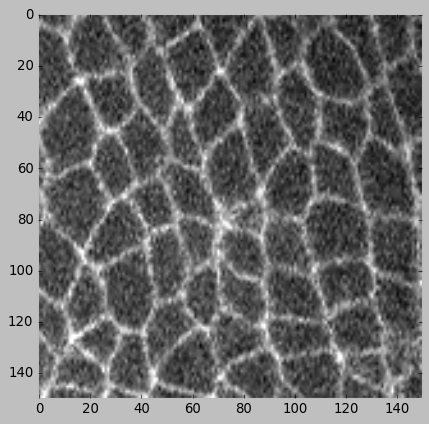

In [13]:
import matplotlib.pyplot as plt
#print(plt.style.available)  # prints all the matplotlib styles that can be used.
plt.style.use(['classic', 'grayscale', 'bmh'])
plt.grid(False)

plt.imshow(animage)
plt.show()

### 5. Accessing pixels

Because images are numpy ndarrays, we can use them as we would use an ndarray. For example, we can access the value of the pixel at coordinates (x, y) = (25, 33) by using:

In [14]:
print(animage[33, 25])  # 2D ndarrays are accessed using [row, col] pairs. 

116


Or we can create a new image using just every other row and column from the top-left corner of the image:

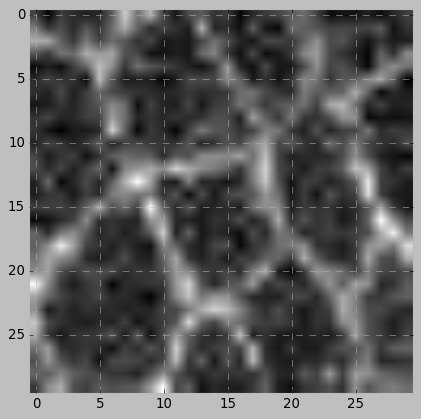

In [15]:
topleft_subsampled = animage[0:60:2, 0:60:2].copy()  # select rows and columns from 0 to 60, with a step of 2 (every other).

plt.imshow(topleft_subsampled)
plt.show()

Based, on what we have learned so far, answer the following questions. Remember that the help system is your friend!

1. What are the dimensions of the new image that we created?

2. How would you create a copy of a 50x50 subimage on the top right corner of the image? And if you wanted to take one in every three rows, and every single column?

3. Is the call to copy() necessary? Why are we using it?

In [16]:
# DELETE THIS CODE
print(f'1. {topleft_subsampled.shape}')

1. (30, 30)


2. (50, 50)


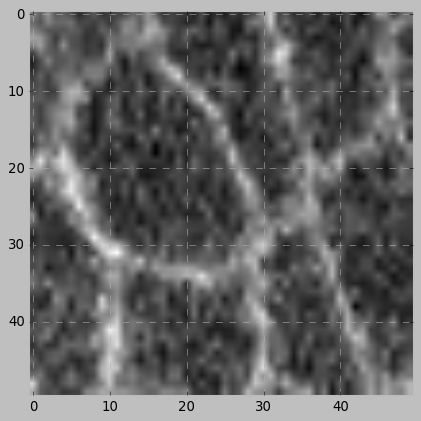

In [17]:
# DELETE THIS CODE.
topright = animage[0:50:1, -51:-1].copy()
print(f'2. {topright.shape}')

plt.imshow(topright)
plt.show()

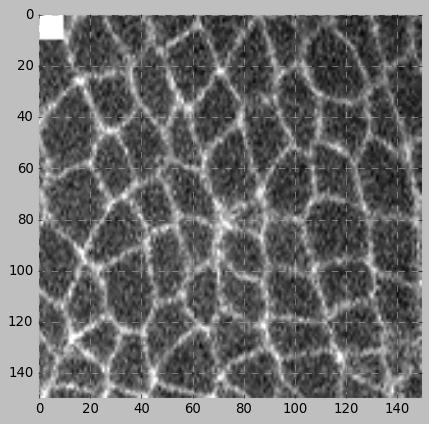

In [18]:
# DELETE THIS CODE
animage.copy?
# The copy method is not necessary if we are just displaying the images. 
# But see what happens if we do not make a copy and we modify a "view" of an array:
topleft_nocopy = animage[0:60, 0:60]
topleft_nocopy[0:10, 0:10] = 255
plt.imshow(animage)
plt.show()

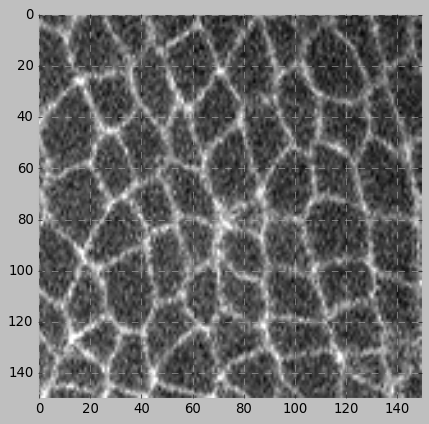

In [19]:
# DELETE THIS CODE.
# In contrast, if we do copy the array:
animage = io.imread('cells.tif')  # read image again.
topleft_copy = animage[0:60, 0:60].copy()
topleft_copy[0:10, 0:10] = 255
plt.imshow(animage)
plt.show()

The ability to use numpy methods on images is really powerful. For example, thresholding can be easily accomplished by:

[[False False False ... False False False]
 [False False False ... False False False]
 [ True  True False ... False False False]
 ...
 [False  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]]


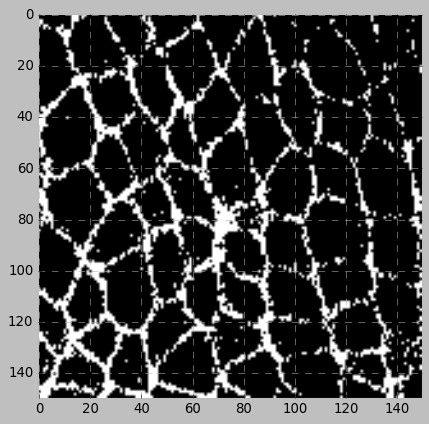

In [20]:
amask = animage > 150  # this creates a new array, notice the data type!!

print(amask)

plt.imshow(amask)
plt.show()

### 6. Filtering
As an example of the use of scikit-image, let's try and segment the outlines of the cells in **animage**. To make sure that the image is the original one, load the image from disk again:

In [21]:
# DELETE THE CODE IN THIS CELL.
animage = io.imread('cells.tif')

The first step of many segmentation pipelines is to blur the image. The idea is to smooth out noise, "flatten" the background, and increase the continuity of boundaries between objects. A common way to blur an image is to apply a **Gaussian filter**. In Gaussian filtering, each pixel value is substituted by a (Gaussian-) weighted average of its neighbouring pixels. 

The scikit-image module **filters** contains methods to filter images. Import the filters module and examine the function **filters.gaussian**:

In [22]:
# DELETE THIS CODE.
from skimage import filters

filters.gaussian?

Let's use skimage.filters.gaussian to smoothen animage. Based on the goals of smoothing the input image mentioned above, can you think of a good value for the sigma parameter? Why did you choose that value?

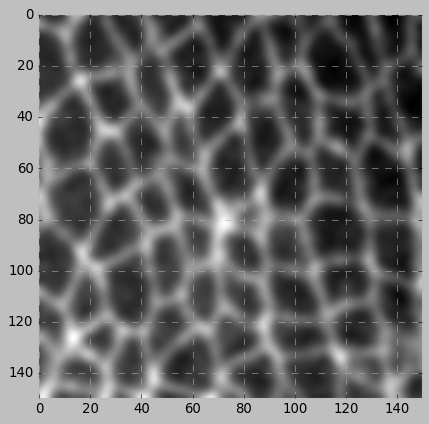

In [23]:
# DELETE THIS CODE.
animage_smooth = filters.gaussian(animage, sigma=2)  # this is a good sigma value, as it flattens the background while providing thick boundaries. 

plt.imshow(animage_smooth)
plt.show()

Pay attention to the pixel values in the smooth image. What is different about them? Can you think of strategies to normalize those values and use at least 8-bits per pixel? The method **skimage.exposure.rescale_intensity** may be useful.

In [24]:
# DELETE THIS CODE.
print(animage_smooth)

import skimage.exposure as exposure

#exposure.rescale_intensity?
animage_smooth_int = numpy.asarray(exposure.rescale_intensity(animage_smooth, 'image')*255, dtype=numpy.uint8)
print(animage_smooth_int)
#print(f'{numpy.amax(animage_smooth_int)}, {numpy.amin(animage_smooth_int)}')

[[0.44131897 0.41903271 0.39628358 ... 0.43072216 0.43059298 0.43072179]
 [0.48477746 0.45959983 0.43195149 ... 0.42395185 0.41969435 0.41633938]
 [0.52944915 0.50261544 0.47204102 ... 0.41168537 0.40024416 0.39071481]
 ...
 [0.66182931 0.70196784 0.72130634 ... 0.35393005 0.35568254 0.36249138]
 [0.68888099 0.7263576  0.73675412 ... 0.36641205 0.36857239 0.37571442]
 [0.71120882 0.74467098 0.74645003 ... 0.38013841 0.38298808 0.39123474]]
[[ 85  74  62 ...  80  80  80]
 [107  94  80 ...  76  74  72]
 [130 116 101 ...  70  64  59]
 ...
 [197 218 228 ...  41  42  45]
 [211 230 235 ...  47  48  52]
 [222 239 240 ...  54  55  60]]


### 7. Segmentation

Now that we have a good input image, let's consider our segmentation strategy. A very common approach to segment touching objects is the **watershed algorithm**. The watershed algorithm is a **region-growing method** which begins with the identification of one point or seed per object. The watershed grows seeds to find the boundaries of the object, and therefore it is important to have one -and only one- seed per object to be segmented.

To use the watershed algorithm in our image, we need to identify one (and only one) seed per cell. We will do that by identifying pixels buried deep within the cytoplasm of each cell.

#### 7.1 Thresholding

To distinguish interfacial and cytoplasmic pixels, we can simply threshold our image. Can you find a good threshold value? If yes, which one? If not, why?

[[ 85  74  62 ...  80  80  80]
 [107  94  80 ...  76  74  72]
 [130 116 101 ...  70  64  59]
 ...
 [197 218 228 ...  41  42  45]
 [211 230 235 ...  47  48  52]
 [222 239 240 ...  54  55  60]]


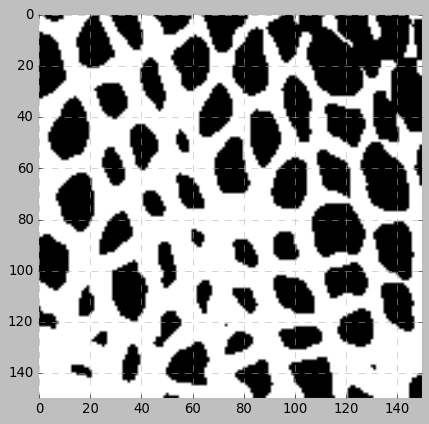

In [25]:
# DELETE THIS CODE.
print(animage_smooth_int)
amask = animage_smooth_int > 70

plt.imshow(amask)
plt.show()

# Illumination is not uniform, and thus, when one corner is properly thresholded, the opposite is not.

Proper thresholding often requires setting a different threshold value per pixel. This is known as **adaptive or local thresholding**. In local thresholding, the threshold value at each pixel depends on the neighbouring pixels (e.g. it is the mean of the pixels within a 3x3 window around each pixel). In scikit-image, local thresholding can be accomplished with the method **skimage.filters.threshold_local**.

Consult the documentation for threshold_local, and use local thresholding to obtain an accurate seggregation between interfacial and cytoplasmic pixels in the image above. What parameters did you use? Which ones did not work? How is the result different from the result using a single threshold for the entire image?

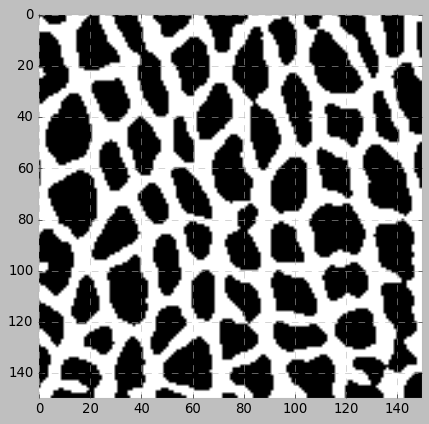

In [26]:
# DELETE THIS CODE

amask = animage_smooth_int>=filters.threshold_local(animage_smooth_int, block_size=17, method='mean')  # there is also a threshold_adaptive, but is deprecated in favour of this one.


plt.imshow(amask)
plt.show()

# The threshold results are uniform throughout the image, rather than favouring one of the image corners.


#### 7.2 Mathematical morphology

The masks resulting from a threshold are rarely perfect. Depending on the threshold selection, too many or too few pixels will be considered to be "foreground", creating extraneous objects, holes, or discontinuities.

Mathematical morphology provides tools to "fix" thresholded images. Mathematical morphology is a discipline based on set theory that enables manipulation and analysis of geometric structures. Mathematical morphology deals with sets of pixels above or below the threshold value. **Erosion, dilation, opening or closing** are some mathematical morphology operations. Similar to our discussion of local thresholds, in morphological operations the value of each pixel (on/off) is determined based on the status (on/off) of a set of neighbours. The set of neighbours that affect the value of any given pixel is determined by a structuring element, a "mask" that is overlaid on each pixel of the original image. Pixels that are "on" in the structuring element are taken into account in the calculation of the new pixel value. Manipulating the size and shape of the structuring element can therefore have dramatic consequences in the results of morphological operations.  

**Opening and closing**, specifically, can be useful to process binary images: opening separates fused objects, and closing fills holes in objects. Opening and closing are implemented in the methods **skimage.morphology.binary_opening and skimage.morphology.binary_closing**, respectively. 

Depending on your choice of threshold, use opening or closing to improve the mask that you generated above:

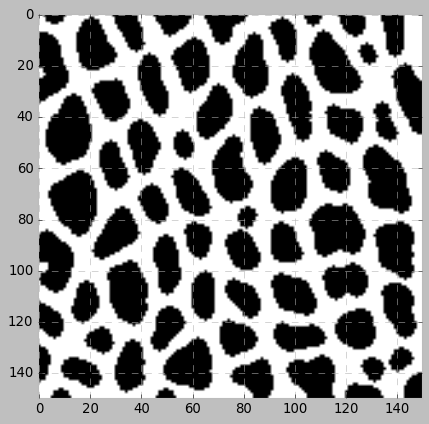

In [27]:
# DELETE THIS CODE.

import skimage.morphology as morphology

structelem = morphology.disk(3)
abettermask = morphology.binary_closing(amask, structelem)

plt.imshow(abettermask)
plt.show()


#### 7.3 Finding seeds: the distance transform

Now that we have a good representation of interfacial pixels, let's find pixels **away** from interfaces. The **distance transform** of a binary image is an image in which the value of each pixel corresponds to its distance to the background. In general, the distance transform can be calculated by iteratively eroding an image until there are no "on" pixels left. The distance transform value of a pixel corresponds to the number of the erosion in which the pixel disappeared.

We can use the distance transform to identify pixels far from cell interfaces. We will use a method in the scipy.ndimage module to calculate the distance transform, **distance_transform_edt**. scikit-image provides its own method to calculate the distance transform (skimage.morphology.medial_axis), but that function does many more things, and using it here is overkill.

Use distance_transform_edt to calculate the distance transform of the mask above. Remember, we are trying to find the distance from any given pixel to the cell interfaces ...

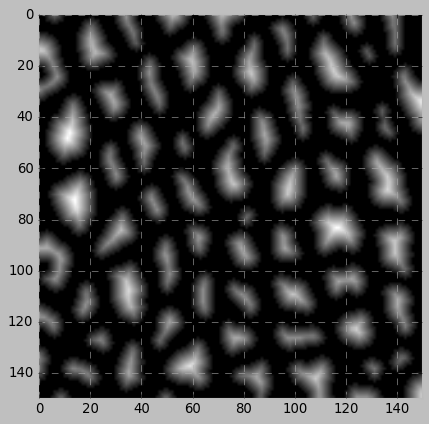

In [28]:
# DELETE THIS CODE.

import scipy.ndimage as ndimage

dt = ndimage.distance_transform_edt(numpy.invert(abettermask))

plt.imshow(dt)
plt.show()


Our goal is to obtain one and only one seed point per cell. Once we have the distance transform, there are multiple ways to obtain one point per cell. To visualize seeds, let's define a function, **plot_seeds** that plots a list of points over an image. The function also returns an image with the seeds.

In [29]:
def plot_seeds(theimage, theseed_coords):
    """
        plot_seeds: plots a set of points on an image.
        
        input:
            theimage: ndarray representing the image.
            theseed_coords: ndarray with two columns and as many rows as points to be displayed, 
                            containing the [y, x] coordinates of each point.     
            
        output:
            seed_image: ndarray representing a labeled image with one object per seed.
    """

    # Create empty seed image.
    seed_image = numpy.zeros(theimage.shape)

    # For each seed ...
    for label, seed_xy in enumerate(theseed_coords):
        # ... set the value of the corresponding pixel to a different value.
        seed_image[seed_xy[0], seed_xy[1]] = label + 1

    # Display the image.
    plt.imshow(theimage, cmap='gray')
    
    # Create a structuring element to dilate (aka grow) seeds a bit for display.
    structelem = morphology.disk(3)
    
    # And overlay the seeds.
    plt.imshow(morphology.dilation(seed_image, structelem), cmap='jet', alpha=0.50)
    plt.show()
    
    return seed_image

To obtain one point per cell, we will extract the local maxima of the distance transform. This could be accomplished in different ways. For example, one could threshold the distance tranform to identify pixels that are **at least** a certain distance away from cell interfaces (you could think about how to implement that solution, perhaps using an adaptive threshold). 

In scikit-image, the skimage.feature module includes the method **peak_local_max**, which can be applied to the distance transform (in combination with the mask that we generated) to obtain one maximum per cell.

Using the documentation of **peak_local_max** and **plot_seeds**, extract and visualize a set of seeds for our image. What are the critical parameters to obtain an accurate number of seeds? What are the limitations of peak_local_max?

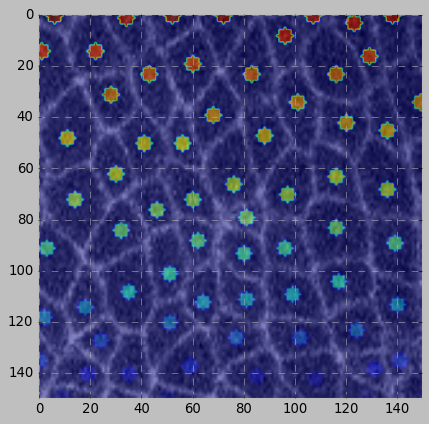

In [30]:
# DELETE THIS CODE
import skimage.feature as feature

coords_maxima = feature.peak_local_max(dt, labels=morphology.label(numpy.invert(abettermask)), num_peaks_per_label=1, exclude_border=False)

seed_image = plot_seeds(animage, coords_maxima)

#### 7.4 Expanding the seeds: the watershed algorithm

We finally have one seed per cell!! The rest is easy. We will grow the seeds using the watershed algorithm.

The watershed algorithm simulates a flooding process. The image is interpreted as a surface in which pixel values represent heights. The surface is pierced at the seed points before submerging it in water. As pixels are "flooded" (in order of "height"), they are assigned to the seed that water came from. scikit-image provides an implementation of the watershed algorithm: **skimage.morphology.watershed**. The **watershed** function returns a **labeled image**, an image in which the value of a pixel indicates the object that the pixel belongs to.

Use skimage.morphology.watershed to obtain a labeled image that represents all the objects in the original image. If you feel adventurous, try to display an ovelay of the labeled image and the grayscale image (the code in plot_seeds could serve as inspiration).

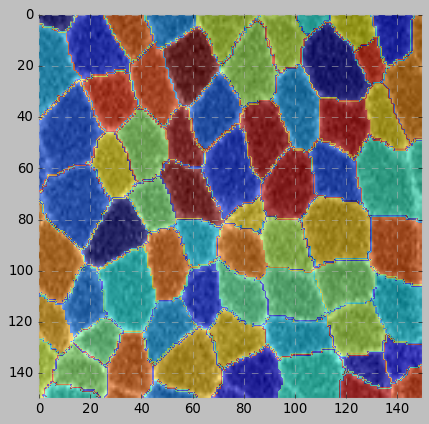

In [34]:
# DELETE THIS CODE

labels = morphology.watershed(animage_smooth_int, seed_image, connectivity=2)  # , mask=image)

vals = numpy.linspace(0,1,128)
numpy.random.shuffle(vals)
cmap = plt.cm.colors.ListedColormap(plt.cm.jet(vals))

plt.imshow(animage, cmap='gray')
import matplotlib.patches as patches
plt.imshow(labels, cmap=cmap, alpha=0.5)
plt.show()

#### 7.5 How well did we do?

We are almost done! Displaying an image overlay of the labeled and the original image is nice, but the colour choices can make it hard to evaluate the segmentation results.

Let's define a function, **plot_contours**, that displays the outlines of each object on the original image. We will take advantage of the method **skimage.measure.find_contours**, which extracts isovalued contours at a certain level Below, we just generate one binary image per object and extract isovalued contours at level zero.

Complete the docstring for the function below:

In [35]:
import matplotlib.patches as patches
import skimage.measure as measure

def plot_contours(thegrayimage, thelabeledimage):
    """
        plot_contours: <one-line function description>
        
        input:
            thegrayimage: <one-line parameter description - data type, meaning, etc.>
            thelabeledimage: <one-line parameter description - data type, meaning, etc.>    
            
        output:
            ax: <one-line parameter description - data type, meaning, etc.>
            
    """
    
    contour_list = list([])

    # Extract contours.
    thelabels = numpy.unique(thelabeledimage)
    for aLabel in thelabels:
        bin_mask = numpy.asarray(thelabeledimage == aLabel,dtype=int)  # skimage.segmentation.find_boundaries can also be used for this.
        aContour = measure.find_contours(bin_mask, 0)
        aContour = aContour[0]

        contour_list.append(aContour)

    plt.imshow(thegrayimage, cmap='gray')
    ax = plt.gca()
    for acontour in contour_list:
        ax.add_patch(patches.Polygon(acontour[:, [1, 0]],linewidth=3,edgecolor='r',facecolor='none'))
    plt.show()
    
    return ax
    

Use **plot_contours** to display the results of our watershed segmentation:

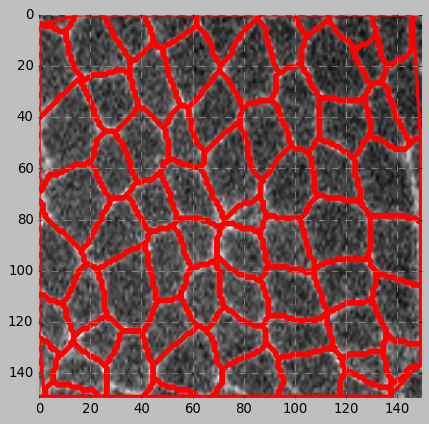

In [36]:
# DELETE THIS CODE.

plot_contours(animage, labels)

What do you think? Are the segmentation results accurate? Can you identify cases of over-segmentation (a cell split into two or more) or undersegmentation (two or more cells fused together)? Can you trace those issues back to their root? Why is the segmentation failing in those cases? Can you think about strategies to alleviate those issues?

DELETE THIS TEXT:
Most issues are due to problems with seed detection. Over-segmentation (e.g. cell at the top right) is caused by having to many seeds in one object, while undersegmentation (a few examples in cells on the bottom row) is caused by not detecting seeds for some cells.

A couple of potential solutions for these issues are:

1. Delete objects in contact with the image boundary: they should not be measured any way (they are only partially visible in the image), and they contribute most of the issues.

1. Add a step to interactive edit the seeds before growing them with the watershed, thus making sure that all cells have one seed and only one seed. 

1. Reduce the threshold used to identify local maxima in the distance transform image. Many of the cells touching the edge did get some information in the distance transform, but that was not identified as a seed.

1. Grow the seeds in a different image, with perhaps even stronger boundaries (e.g. the gradient of the original image).


### 8. Image measurement

Our last step is to measure the cells. The method **skimage.measure.regionprops** is an excellent tool to do this. Take a look at its documentation. Under the **Notes** section there is a list of features that regionprops measures, including area, perimeter, pixel value, etc.

In [37]:
# DELETE THIS CODE.
measure.regionprops?

We can use regionprops to measure all the cells in an image. The measurements can be accessed and collected into convenient lists like this:

In [38]:
# Measure labeled image.
cell_props = measure.regionprops(labels)  

# Define two empty lists to store areas and perimeters.
cell_areas = []
cell_perimeters = []

# Loop through the measurements for each cell ...
for acell in cell_props:
    # ... and store both area and perimeter in the corresponding lists.
    cell_areas.append(acell.area)
    cell_perimeters.append(acell.perimeter)

# Print the area and perimeter measurements.
print(cell_areas)
print(cell_perimeters)

[115, 135, 77, 86, 417, 381, 383, 282, 179, 492, 182, 125, 214, 343, 324, 388, 316, 226, 298, 410, 304, 321, 414, 544, 375, 367, 316, 336, 438, 484, 246, 425, 591, 133, 273, 377, 591, 457, 705, 516, 347, 303, 238, 389, 659, 398, 260, 359, 390, 431, 436, 355, 549, 476, 383, 433, 142, 448, 385, 284, 178, 227, 248, 74, 259, 187, 76]
[42.27817459305202, 52.31370849898476, 44.72792206135786, 47.10660171779821, 81.79898987322332, 81.11269837220809, 77.83452377915606, 68.11269837220809, 55.59188309203678, 86.66904755831214, 55.798989873223334, 52.14213562373095, 56.18376618407356, 80.07716446627535, 73.01219330881976, 75.45584412271572, 72.84062043356595, 61.834523779156065, 70.94112549695429, 81.83452377915606, 70.31980515339464, 75.94112549695427, 82.24873734152916, 94.80508652763321, 74.62741699796952, 77.698484809835, 67.698484809835, 73.21320343559641, 95.01219330881975, 85.55634918610406, 62.420310216782966, 85.7401153701776, 94.52691193458118, 47.21320343559643, 64.52691193458118, 83.9

### 9. Data visualization

Plotting measurement results is often more useful that printing each one of the measurements. We will use **matplotlib** to generate plots. Below is an example from the [matplotlib website](https://matplotlib.org/2.0.0/examples/statistics/boxplot_vs_violin_demo.html) that generates a violin and a box plot for random, test data:

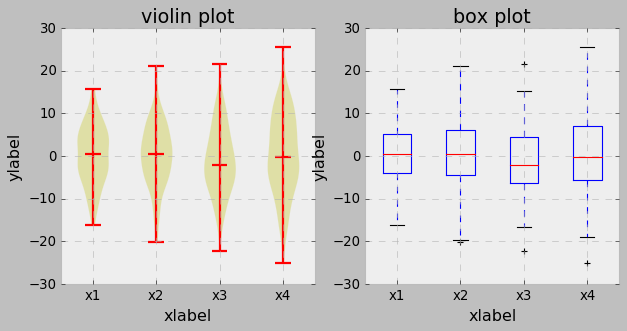

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# generate some random test data
all_data = [numpy.random.normal(0, std, 100) for std in range(6, 10)]

# plot violin plot
axes[0].violinplot(all_data,
                   showmeans=False,
                   showmedians=True)
axes[0].set_title('violin plot')

# plot box plot
axes[1].boxplot(all_data)
axes[1].set_title('box plot')

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y+1 for y in range(len(all_data))])
    ax.set_xlabel('xlabel')
    ax.set_ylabel('ylabel')

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=['x1', 'x2', 'x3', 'x4'])
plt.show()

Use the code above as guide to generate a figure with two plots, each of them comparing area and perimeter for the cells in the original image, displayed as a violin plot on the left, and as a box plot on the right.

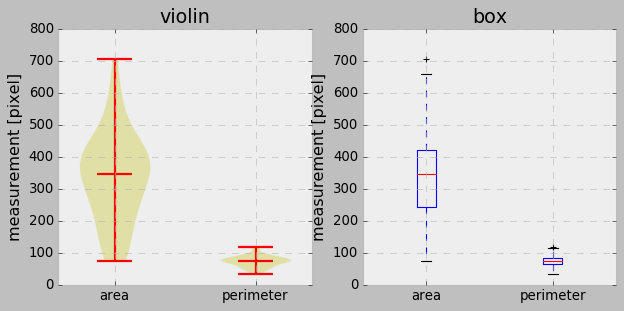

In [40]:
# DELETE THIS CODE.

#plt.figure()
#ax = plt.gca()

all_data = [numpy.asarray(cell_areas), numpy.asarray(cell_perimeters)]
#ax.boxplot(all_data)
#plt.show()


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
axes[0].violinplot(all_data, showmeans=False, showmedians=True)
axes[0].set_title('violin')
axes[0].set_ylabel('measurement [pixel]')
axes[0].set_xticks([y+1 for y in range(len(all_data))])
axes[0].set_xticklabels(['area', 'perimeter'])
axes[1].boxplot(all_data)
axes[1].set_title('box')
axes[1].set_ylabel('measurement [pixel]')
axes[1].set_xticks([y+1 for y in range(len(all_data))])
axes[1].set_xticklabels(['area', 'perimeter'])

plt.show()

<a id='additional_materials'></a>
### 10. Additional materials

#### 10.1 Tutorials
* Python: https://scipy-lectures.org/intro/language/python_language.html
* numpy: https://scipy-lectures.org/intro/numpy/index.html
* scikit-image: https://scipy-lectures.org/packages/scikit-image/index.html
* matplotlib: https://scipy-lectures.org/intro/matplotlib/index.html

#### 10.2 Documentation
* Python: https://docs.python.org/3/
* numpy: https://numpy.org/doc/
* scikit-image: https://scikit-image.org/docs/dev/
* matplotlib: https://matplotlib.org/3.1.1/contents.html